+ https://www.whitehouse.gov/wp-content/uploads/2025/04/Annex-II.pdf
+  https://mygts.dhl.com/pre-shipment-planner

In [1]:
from matplotlib import pyplot as plt
import numpy as np
oshpark_price_lv = 5/3  #  $5/sqin for 3x boards
oshpark_price_hv = 1  #  $1/sqin


# 0.25mm Hole, all ENIG, 6/6 mil traces

# TG175, ENIG 3um
pcbway_prices_tg150_hasl = (
    (5, 10, 21),
    (15, 14.8, 21),
    (100, 42, 21),
    (200, 52, 25),
    (300, 59, 25),
    (500, 86, 27),
    (1000, 180, 41),
)

# TG175, ENIG 3um
pcbway_prices_tg175_enig = (
    (5, 116.71, 21),
    (15, 117.21, 21),
    (100, 141.19, 21),
    (200, 154.34, 25),
    (300, 162.61, 25),
    (500, 194.23, 27),
    (1000, 292.3, 41),
)

jlcpcb_prices_tg140_hasl = (
    (5, 2.1, 23),
    (20, 5.4, 23),
    (50, 10.7, 23),
    (100, 13.1, 23),
    (200, 12.1, 32),
    (300, 23, 32),
    (500, 32.8, 40),
    (1000, 57.3, 56),
)

# TG140, ENIG 2um, plugged vias
jlcpcb_prices_tg140_enig = (
    (5, 80.92, 23),
    (20, 84.95, 23),
    (50, 90.35, 23),
    (100, 95.07, 23),
    (200, 104.81, 32),
    (300, 114.35, 32),
    (500, 133.62, 40),
    (1000, 181.72, 56),
)


oshpark_shipping = 0
tarriff_fraction = 0.55
fees = 11.78  #  Maximum Customs surcharge under $2500

def calculate_dhl_fees(duty):
    return 1.31 + max([17, 2/100*duty])
    
def get_osh_prices(area):
    unit_price = oshpark_price_lv
    if area > 100:
        unit_price = oshpark_price_hv
    return area*unit_price + oshpark_shipping

def get_imported_prices(price_matrix):
    areas = [x for x, *_ in price_matrix]
    prices = [price*(1+tarriff_fraction) +
             fees + shipping + calculate_dhl_fees(price*tarriff_fraction)
             for x, price, shipping in price_matrix]
    return areas, prices


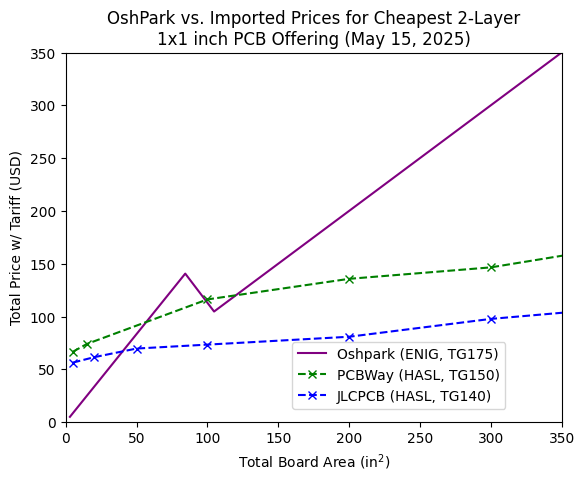

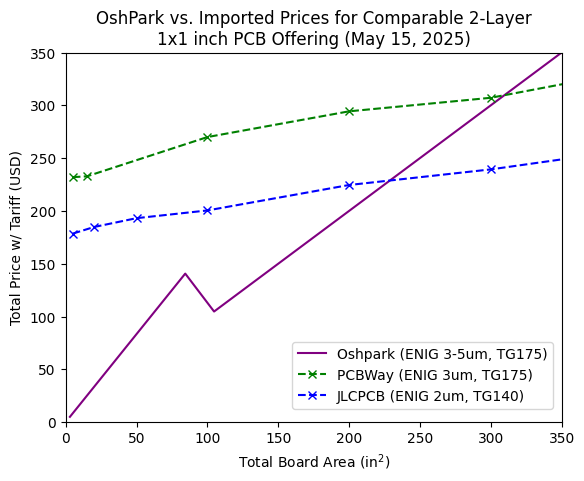

In [5]:
xlims = [0, 350]
ylims = [0, 350]

x = np.linspace(3, 1000, 50)
fig, ax = plt.subplots()
ax.plot(x, [get_osh_prices(pt) for pt in x], color="purple", label="Oshpark (ENIG, TG175)")
ax.plot(*get_imported_prices(pcbway_prices_tg150_hasl), 'x--', color="green", label="PCBWay (HASL, TG150)")
ax.plot(*get_imported_prices(jlcpcb_prices_tg140_hasl), 'x--', color="blue", label="JLCPCB (HASL, TG140)")
ax.set_title("OshPark vs. Imported Prices for Cheapest 2-Layer\n1x1 inch PCB Offering (May 15, 2025)")
ax.set_xlabel("Total Board Area (in$^2$)")
ax.set_ylabel("Total Price w/ Tariff (USD)")
ax.set_xlim(xlims)
ax.set_ylim(ylims)
fig.legend(loc=(0.5, 0.15))
fig.savefig("/home/simon/Desktop/oshpark-cost-comparison.pdf")
fig.savefig("/home/simon/Desktop/oshpark-cost-comparison.png")


x = np.linspace(3, 1000, 50)
fig, ax = plt.subplots()
ax.plot(x, [get_osh_prices(pt) for pt in x], color="purple", label="Oshpark (ENIG 3-5um, TG175)")
ax.plot(*get_imported_prices(pcbway_prices_tg175_enig), 'x--', color="green", label="PCBWay (ENIG 3um, TG175)")
ax.plot(*get_imported_prices(jlcpcb_prices_tg140_enig), 'x--', color="blue", label="JLCPCB (ENIG 2um, TG140)")
ax.set_title("OshPark vs. Imported Prices for Comparable 2-Layer\n1x1 inch PCB Offering (May 15, 2025)")
ax.set_xlabel("Total Board Area (in$^2$)")
ax.set_ylabel("Total Price w/ Tariff (USD)")
ax.set_xlim(xlims)
ax.set_ylim(ylims)
fig.legend(loc=(0.5, 0.15))
fig.savefig("/home/simon/Desktop/oshpark-cost-comparison-enig.pdf")
fig.savefig("/home/simon/Desktop/oshpark-cost-comparison-enig.png")